In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [5]:
i = load_iris()

In [20]:
iris_data = pd.DataFrame(data = i.data , columns = i.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
# standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
x_scaled = scaler.fit_transform(iris_data)

In [28]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [30]:
# apply the pca 
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)

In [36]:
pca_scaled = pca.fit_transform(x_scaled)
pca_scaled.shape

(150, 2)

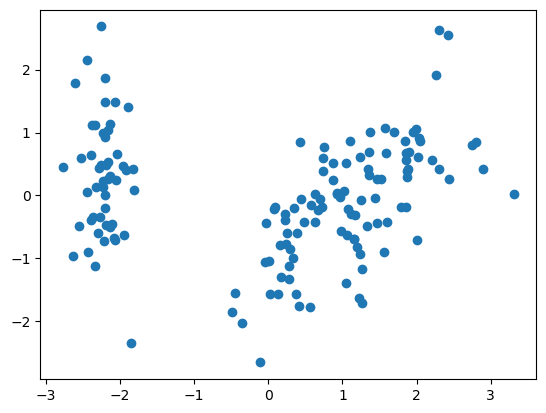

In [38]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

In [40]:
# agglomerative clustering
# to construct a dendogram

import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'eucledian distance')

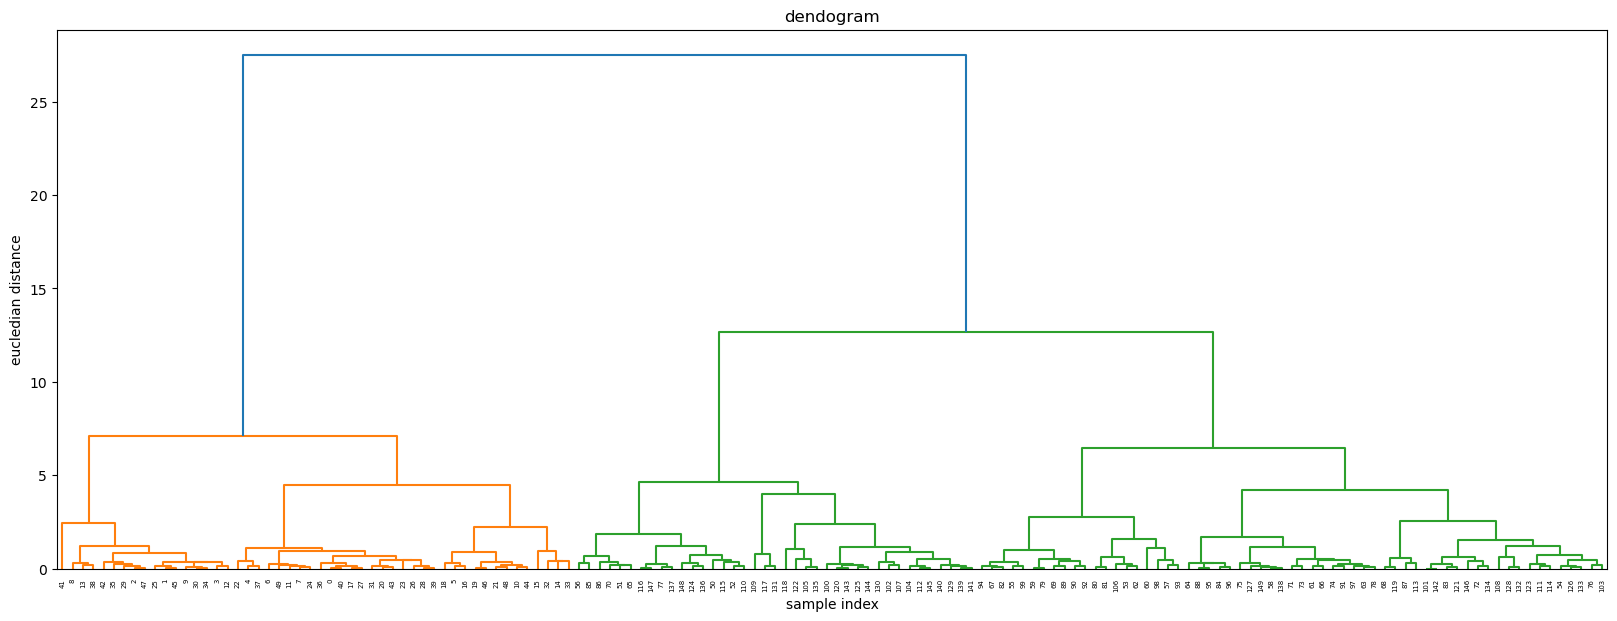

In [42]:
plt.figure(figsize=(20,7))
plt.title('dendograms')

#create dendogram
sc.dendrogram(sc.linkage(pca_scaled , method='ward'))
plt.title('dendogram')
plt.xlabel('sample index')
plt.ylabel('eucledian distance')



In [44]:
from sklearn.cluster import AgglomerativeClustering

In [50]:
cluster = AgglomerativeClustering(n_clusters=2,metric = 'euclidean',linkage = 'ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [52]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

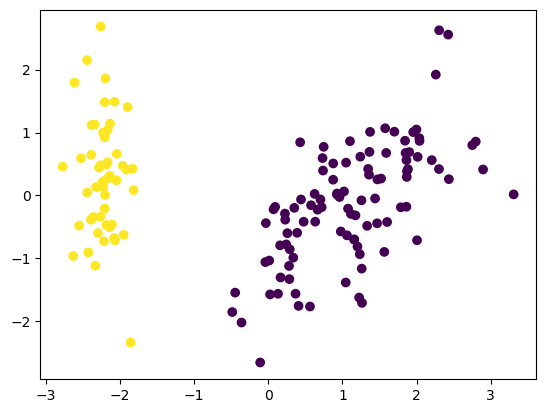

In [54]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [56]:
## silhouette score
from sklearn.metrics import silhouette_score

In [64]:
silhouette_cofficient=[]

for k in range(2,11):
    agg=AgglomerativeClustering(n_clusters=k,metric = 'euclidean',linkage = 'ward')
    agg.fit(x_scaled)
    score=silhouette_score(pca_scaled,agg.labels_)
    silhouette_cofficient.append(score)
    

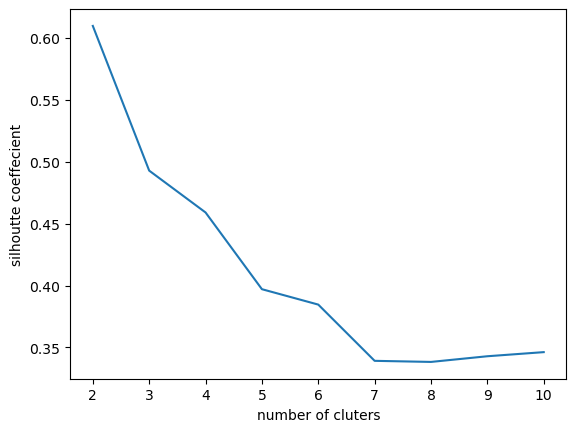

In [70]:
plt.plot(range(2,11),silhouette_cofficient)
plt.xticks(range(2,11))
plt.xlabel('number of cluters')
plt.ylabel('silhoutte coeffecient')
plt.show()